In [1]:
# include necessary packages
from __future__ import print_function
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
# load your solutions
from p1 import *

## Question 1
Write a python function to load a gray image and return a Numpy array
```
def read_image(im_path):
    # TODO
    return img
```

Input:
* im_path: a string, the path to the gray image we are loading, for example 'two_objects.pgm'


Output:
* return a numpy array img, of size (H,W), type np.uint8 and range 0~255

Written:
* Which python package/function are you using to load the image?

Scores: 1

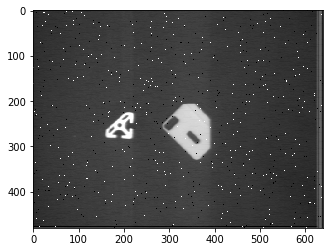

In [3]:
### Verify
img = read_image('two_objects.pgm')
assert isinstance(img, np.ndarray)
assert img.dtype == np.uint8
assert np.all(img>=0) and np.all(img<=255)
plt.imshow(img, cmap='gray')
plt.show()

## Question 2
Write a python function to compute the image histogram given a gray image (0~255)
```
def histogram(gray_in):
    # TODO
    return hist
```

Input:
* gray_in: a numpy array, of size (H,W), type np.uint8 and range 0~255

Output:
* return a numpy array hist, of size (256,), type np.int and range 0~inf

Scores: 2

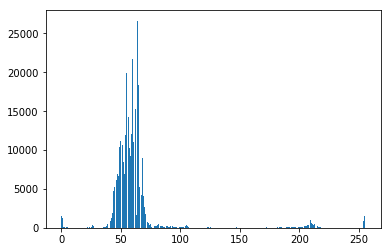

In [4]:
### Verify
hist_res = histogram(img)
assert isinstance(hist_res, np.ndarray)
assert np.all(hist_res>=0)
histogram_opencv = lambda x: cv2.calcHist([x],[0],None,[256],[0,256]).ravel()
assert np.allclose(
    histogram_opencv(img),
    hist_res
)
plt.bar(range(256), hist_res)
plt.show()

## Question 3
Write a python function to denoise the gray image by median filtering
```
def denoisy_median_filtering(gray_in, diameter=3):
    # TODO
    return denoised_img
```

Inputs:
* gray_in: a numpy array, of size (H,W), type np.uint8 and range 0~255
* diameter: median filter kernel size, it must be odd and greater than 1, for example: 3, 5, 7 ...

Outputs:
* return a numpy array denoised_img, with the same format as the input gray_in

Written:
* How does your function handle the boundary when do median filtering? You can compare your function with cv2.medianBlur.

Scores: 4

In [ ]:
### Verify
denoised_img = denoisy_median_filtering(img, diameter=3)
denoisy_median_filtering_opencv = lambda x,k: cv2.medianBlur(x,k)
assert np.allclose(
    denoisy_median_filtering_opencv(img, 3),
    denoised_img
)
plt.imshow(denoised_img, cmap='gray')
plt.show()

## Question 4
Write a python function to binarize a gray image given a threshold (when greater than threshold, set to 255; otherwise 0).
```
def binarize(gray_in, threshold=128):
    # TODO
    return binary_image
```

Inputs:
* gray_in: a numpy array, of size (H,W), type np.uint8 and range 0~255
* threshold: a integer between 0 and 255

Outputs:
* return a numpy array denoised_img, with the same format as the input gray_in; but the values can be only 0 or 255

Scores: 2


In [ ]:
### Verify
binarized_img = binarize(denoised_img, 128)
assert np.all([i in [0,255] for i in np.unique(binarized_img)])
binarize_opencv = lambda x,th: cv2.threshold(x,th,255,cv2.THRESH_BINARY)[1]
assert np.allclose(
    binarize_opencv(denoised_img, 128),
    binarized_img
)
plt.imshow(binarized_img, cmap='gray')
plt.show()

## Question 5
Write a python function to do implement sequential labelling algorithm
```
def sequential_label(binary_in):
    # TODO
    return labelled_img
```

Inputs:
* binary_in: a numpy array, of size (H,W), type np.uint8 and its value can only be 0 or 255

Outputs:
* return a numpy array labelled_img, of size (H,W), type np.uint8 and its value should be 0 for background, and non-zero for object label
    
Scores: 6

In [ ]:
### Verify with a toy input
inp = 255*np.array([[1,0,1,0,1]],dtype=np.uint8)
plt.imshow(inp, cmap='gray')
plt.axis('off')
plt.show()
labelled_img = sequential_label(inp)
plt.imshow(labelled_img)
plt.axis('off')
plt.show()
print(labelled_img)

### Verify with regular input
labelled_img = sequential_label(binarized_img)
plt.imshow(binarized_img, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(labelled_img)
plt.axis('off')
plt.show()
print(labelled_img)

## Question 6
Write a python function to return zeroth, first, second moments.

$
m_{0,0}=\iint_I b(x,y)dxdy\\
m_{1,0}=\iint_I xb(x,y)dxdy\\
m_{0,1}=\iint_I yb(x,y)dxdy\\
m_{2,0}=\iint_I x^2b(x,y)dxdy\\
m_{1,1}=\iint_I xyb(x,y)dxdy\\
m_{0,2}=\iint_I y^2b(x,y)dxdy\\
$

Please also return central second moments. Where $\bar{x}=\frac{\iint_I xb(x,y)dxdy}{\iint_I b(x,y)dxdy}$, and $\bar{y}=\frac{\iint_I yb(x,y)dxdy}{\iint_I b(x,y)dxdy}$

$
mu_{2,0}=\iint_I (x-\bar{x})^2b(x,y)dxdy\\
mu_{1,1}=\iint_I (x-\bar{x})(y-\bar{y})b(x,y)dxdy\\
mu_{0,2}=\iint_I (y-\bar{y})^2b(x,y)dxdy\\
$

The output should be a dictionary of list, corresponding to 9 numbers above, for every connected component.
```
def compute_moment(labelled_in):
    # TODO
    # moment_dict = {label_idx: [m_00, m_01, m_10, m_02, m_11, m_20, mu_02, mu_11, mu_20], ...}
    return moment_dict
```

Inputs:
* labelled_in: a numpy array, of size (H,W), type np.uint8 and its value should be 0 for background, and non-zero for object label

Outputs:
* return a dictionary moment_dict, whose keys are the object label, and the values are list, containing [m_00, m_01, m_10, m_02, m_11, m_20, mu_02, mu_11, mu_20] corresponding to the object

Written:
* What would $\iint_I (x-\bar{x})b(x,y)dxdy$ and $\iint_I (y-\bar{y})b(x,y)dxdy$ be?

Scores: 2

In [ ]:
# Verify
def moment_opencv(labelled_in):
    res = {}
    for label_idx in np.unique(labelled_img):
        if label_idx == 0:
            continue
        masked_in = (labelled_in==label_idx).astype(labelled_in.dtype)
        moments = cv2.moments(masked_in)
        res[label_idx] = [moments['m00'],moments['m01'],moments['m10'],
                          moments['m02'],moments['m11'],moments['m20'],
                          moments['mu02'],moments['mu11'],moments['mu20']]
    return res

moment_res = compute_moment(labelled_img)
moment_gt = moment_opencv(labelled_img)
assert set(moment_res.keys()) == set(moment_gt.keys())
for k in moment_res.keys():
    assert np.allclose(moment_res[k], moment_gt[k])

## Question 7
Write a python function to return attributes (area, position -- central of area, roundedness) of every connected component (i.e. object).  
Feel free to use function from Question 6.


The output should be a dictionary of list, corresponding to 3 numbers above, for every connected component.
```
def compute_attribute(labelled_in):
    # TODO
    # attribute_dict = {label_idx: [area, (y_pos, x_pos), roundedness], ...}
    return attribute_dict
```

Inputs:
* labelled_in: a numpy array, of size (H,W), type np.uint8 and its value should be 0 for background, and non-zero for object label

Outputs:
* return a dictionary attribute_dict, whose keys are the object label, and the values are list, containing [area, (y_pos, x_pos), roundedness] corresponding to the object

Written:
* What is the relationship between {area, y_pos and x_pos} and the moments we computed in Q6?
* Briefly describle how you calculated the roundedness.

Scores: 3

In [ ]:
# Verify
attribute_dict = compute_attribute(labelled_img)

## Question 8
Write a python function to recognize objects given a image and attributes of target objects; find the target objects in this image.
Feel free to use result from Q7, as well as other functions you've written.

The output should be new image with only recognized objects shown
```
def recognize_objects(new_img_path, attribute_dict):
    # TODO
    return result_img
```

Inputs:
* new_img_path: a string, the path to the gray image we are loading, for example 'many_objects_1.pgm'
* attribute_dict: a dictionary, which is the result of Question 7

Outputs:
* return a numpy array result_img, with the same size of new_img_path, type of np.uint8, and its value can be 255 for objects described in attribute_dict (which means objects appeared in two_objects.pgm in our case); and 0 otherwise

Written:
* How does your function determine whether an object is a target object (described in attribute_dict)?

Scores: 4

In [ ]:
# Verify
result_img = recognize_objects('many_objects_1.pgm', attribute_dict)
plt.imshow(result_img, cmap='gray')
plt.show()
result_img = recognize_objects('many_objects_2.pgm', attribute_dict)
plt.imshow(result_img, cmap='gray')
plt.show()